In [68]:
import numpy as np
import pandas as pd
import re
import matplotlib
import matplotlib.pyplot as plt
import mysql.connector as mariadb

In [69]:
mariadb_connection = mariadb.connect(user='baseball', password='', database='retrosheet')
cursor = mariadb_connection.cursor()
cursor.execute("SELECT * FROM transitions;")
transitions = pd.DataFrame(cursor.fetchall())
transitions.columns = [x[0] for x in cursor.description]
#transitions.set_index('transition', inplace=True)

In [70]:
def list_bases():
    return(['0','1','2','3','12','13','23','123'])

def list_transient_outs():
    return(['','X','XX'])

def list_transient_states():
    states = []
    for o in list_transient_outs():
        for b in list_bases():
            states.append(b+o)
    return(states)

def list_from_states():
    from_states = []
    for s in list_transient_states():
        from_states.append(s+':')
    return(from_states)

def list_to_states():
    to_states = []
    for s in list_transient_states():
        to_states.append(':'+s)
    to_states.append(':XXX')
    return(to_states)

def list_conceivables():
    conceivables = []
    for s0 in list_transient_states():
        for s1 in list_to_states():
            conceivables.append(s0+s1)
    return(conceivables)

In [71]:
df = pd.DataFrame(np.zeros((24,25)))
df.index = list_from_states()
df.columns = list_to_states()

In [86]:
for i in range(len(transitions)):
    t = transitions.iloc[i,:].transition
    old = re.search('^[0-3X]*:', t).group()
    new = re.search(':[0-3X]*$', t).group()
    u = transitions.iloc[i,:].u_conditional
    df.loc[old,new] = u

In [90]:
df.iloc[0:8,0:8]

,:0,:1,:2,:3,:12,:13,:23,:123
0:,1.608851,0.596269,1.332662,2.149816,0.000000,0.000000,0.000000,0.000000
1:,1.657488,3.574625,1.902425,2.146831,0.707327,1.312909,1.485540,0.000000
2:,1.755221,1.263370,1.360083,2.139716,0.997421,1.022882,2.277203,0.000000
3:,1.740078,0.770407,1.330272,2.016552,0.000000,0.941847,3.820464,0.000000
12:,1.659234,3.411522,1.909351,2.153619,1.331776,1.494986,1.470913,0.794981
13:,1.643308,3.373398,1.918009,2.139315,0.859135,1.301648,1.422095,1.098169
23:,1.722638,1.230769,1.317999,2.056372,2.141908,1.097704,2.120297,0.814584
123:,1.612853,3.943267,1.915510,2.113320,1.255203,1.463260,1.394264,0.788235


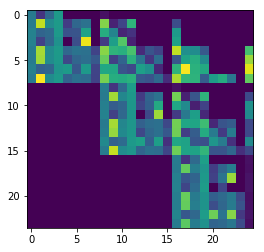

In [93]:
fig, ax = plt.subplots()
im = plt.imshow(np.array(df))

In [79]:
re.search('^[0-3X]*:','12XX:XXX').group()

'12XX:'

In [82]:
re.search(':[0-3X]*$','12XX:123XX').group()

':123XX'